In [2]:
import rasterio #Rasteerio is a library for reading and writing geospatial raster data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("..")  # go up from /scripts to /


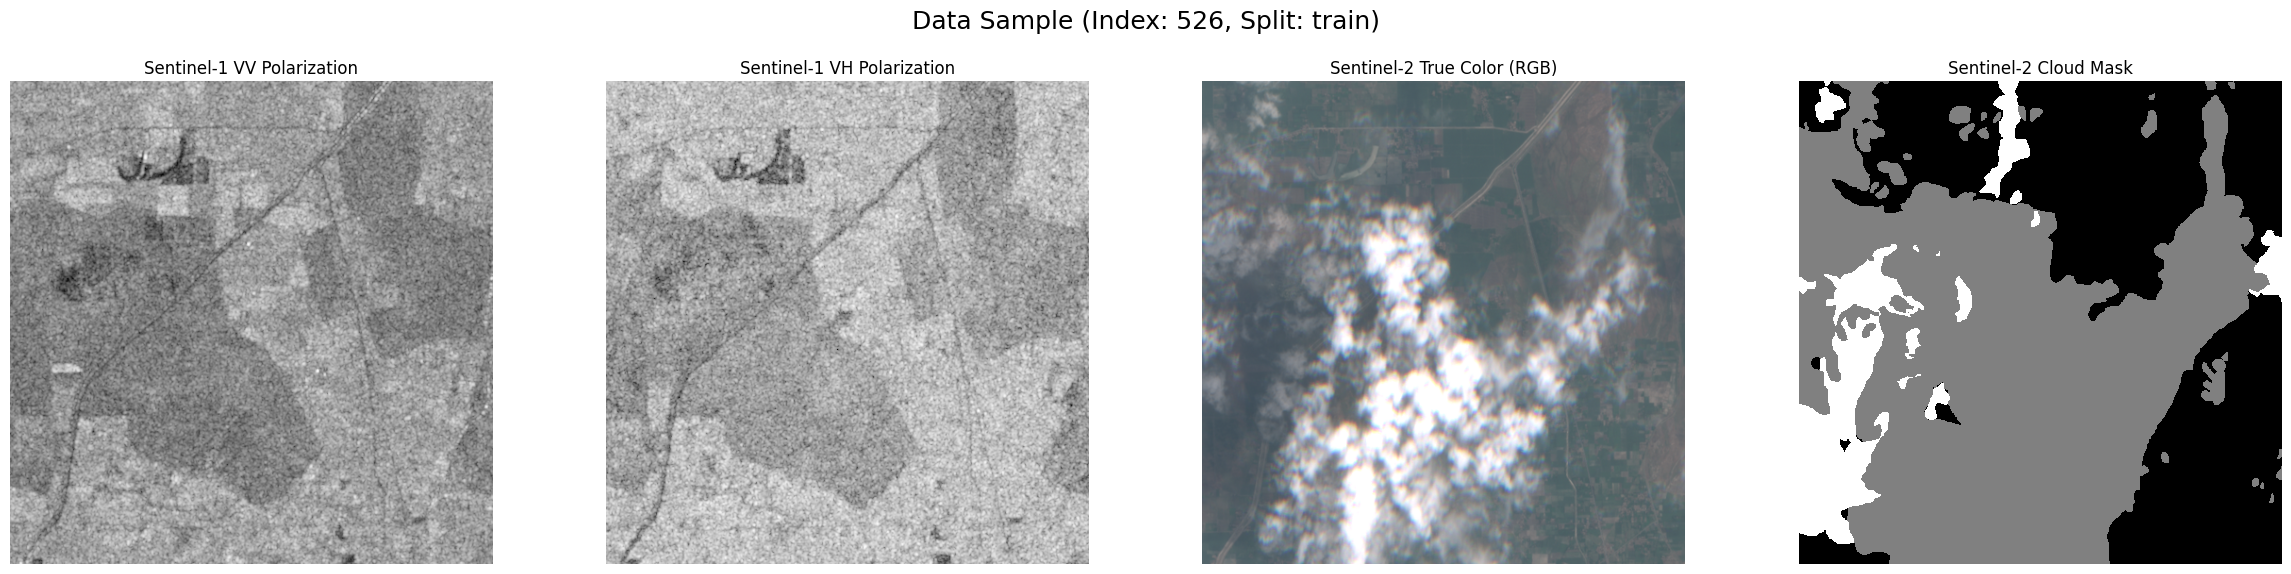

VV
min: -27.425196 max: 4.5849524 mean: -9.231338 std: 3.1202726
99.94% of pixels in typical dB range (-25 to 0)
0.06% of pixels in positive range (0–30)
VH
min: -37.18071 max: -5.7206836 mean: -15.96877 std: 3.2146947
99.26% of pixels in typical dB range (-25 to 0)
0.00% of pixels in positive range (0–30)
VV - VH
min: -6.2237444 max: 27.81881 mean: 6.7374315 std: 2.9881546
0.90% of pixels in typical dB range (-25 to 0)
99.10% of pixels in positive range (0–30)
S2 R
min: 991 max: 5429 mean: 1933.5824813842773 std: 787.6963981098287
S2 G
min: 1218 max: 5220 mean: 2038.4579429626465 std: 700.5493917766312
S2 B
min: 1384 max: 5354 mean: 2117.331787109375 std: 715.7290054490209
S2 RGB
min: 991 max: 5429 mean: 2029.7907371520996 std: 739.4812730369223
s2_cloud_mask
min: 0 max: 2 mean: 0.7020645141601562 std: 0.6184922505988363


In [19]:
def visualize_sample(manifest_path, sample_idx=0):
    '''
    Visualizes a sample from the manifest file.
    Args:
        mainfest_path (str): Path to the manifest file.
        sample_idx (int): Index of the sample to visualize.
    '''
    df = pd.read_csv(manifest_path)
    sample = df.iloc[sample_idx]

    #Load SAR data
    with rasterio.open(sample['s1_vv']) as src:
        s1_vv = src.read(1)
    with rasterio.open(sample['s1_vh']) as src:
        s1_vh = src.read(1)


    #Load optical data
    with rasterio.open(sample['s2_b4_red']) as src:
        s2_r = src.read(1)
    with rasterio.open(sample['s2_b3_green']) as src:
        s2_g = src.read(1)
    with rasterio.open(sample['s2_b2_blue']) as src:
        s2_b = src.read(1)

    #stack to creater RGB image
    s2_rgb = np.dstack((s2_r, s2_g, s2_b))
    s2_rgb = np.clip(s2_rgb / 4000.0, 0, 1)  # Normalize the RGB values

    #Load cloud Mask
    with rasterio.open(sample['s2_cloudmask']) as src:
        s2_cloud_mask = src.read(1)

    #plotting
    fig, axes = plt.subplots(1, 4, figsize=(24, 6))
    fig.suptitle(f"Data Sample (Index: {sample_idx}, Split: {sample['split']})", fontsize=18)

     # Plot 1: Sentinel-1 VV
    axes[0].imshow(s1_vv, cmap='gray')
    axes[0].set_title("Sentinel-1 VV Polarization")
    axes[0].axis('off')

    # Plot 2: Sentinel-1 VH
    axes[1].imshow(s1_vh, cmap='gray')
    axes[1].set_title("Sentinel-1 VH Polarization")
    axes[1].axis('off')

    # Plot 3: Sentinel-2 RGB
    axes[2].imshow(s2_rgb)
    axes[2].set_title("Sentinel-2 True Color (RGB)")
    axes[2].axis('off')

    # Plot 4: Sentinel-2 Cloud Mask
    axes[3].imshow(s2_cloud_mask, cmap='gray', interpolation='none')
    axes[3].set_title("Sentinel-2 Cloud Mask")
    axes[3].axis('off')

    plt.tight_layout(rect=(0, 0.03, 1, 0.95)) # Adjust layout to make room for suptitle
    plt.show()


    with rasterio.open(sample['s1_vv']) as src:
        arr = src.read(1).astype(np.float32)
    print("VV")
    print("min:", arr.min(), "max:", arr.max(), "mean:", arr.mean(), "std:", arr.std())
    # Check approximate dB range
    dN = np.logical_and(arr >= -25, arr <= 0).sum()
    pN = np.logical_and(arr >= 0, arr <= 30).sum()
    total = arr.size
    vv_arr = arr

    print(f"{dN/total:.2%} of pixels in typical dB range (-25 to 0)")
    print(f"{pN/total:.2%} of pixels in positive range (0–30)")

    with rasterio.open(sample['s1_vh']) as src:
        arr = src.read(1).astype(np.float32)
    print("VH")
    print("min:", arr.min(), "max:", arr.max(), "mean:", arr.mean(), "std:", arr.std())
    # Check approximate dB range
    dN = np.logical_and(arr >= -25, arr <= 0).sum()
    pN = np.logical_and(arr >= 0, arr <= 30).sum()
    total = arr.size
    vh_arr = arr

    print(f"{dN/total:.2%} of pixels in typical dB range (-25 to 0)")
    print(f"{pN/total:.2%} of pixels in positive range (0–30)")

    arr = vv_arr - vh_arr
    print("VV - VH")
    print("min:", arr.min(), "max:", arr.max(), "mean:", arr.mean(), "std:", arr.std())
    # Check approximate dB range
    dN = np.logical_and(arr >= -25, arr <= 0).sum()
    pN = np.logical_and(arr >= 0, arr <= 30).sum()
    total = arr.size
    vh_arr = arr

    print(f"{dN/total:.2%} of pixels in typical dB range (-25 to 0)")
    print(f"{pN/total:.2%} of pixels in positive range (0–30)")

    arr = s2_r
    print("S2 R")
    print("min:", arr.min(), "max:", arr.max(), "mean:", arr.mean(), "std:", arr.std())

    arr = s2_g
    print("S2 G")
    print("min:", arr.min(), "max:", arr.max(), "mean:", arr.mean(), "std:", arr.std())

    arr = s2_b
    print("S2 B")
    print("min:", arr.min(), "max:", arr.max(), "mean:", arr.mean(), "std:", arr.std())

    s2_rgb = np.stack([s2_r, s2_g, s2_b], axis=0)
    print("S2 RGB")
    print("min:", s2_rgb.min(), "max:", s2_rgb.max(), "mean:", s2_rgb.mean(), "std:", s2_rgb.std())

    print("s2_cloud_mask")
    print("min:", s2_cloud_mask.min(), "max:", s2_cloud_mask.max(), "mean:", s2_cloud_mask.mean(), "std:", s2_cloud_mask.std())



if __name__ == "__main__":
    MANIFEST_PATH = "data/processed/data_manifest.csv"
    # data\processed\data_manifest.csv
    visualize_sample(MANIFEST_PATH, sample_idx=526)


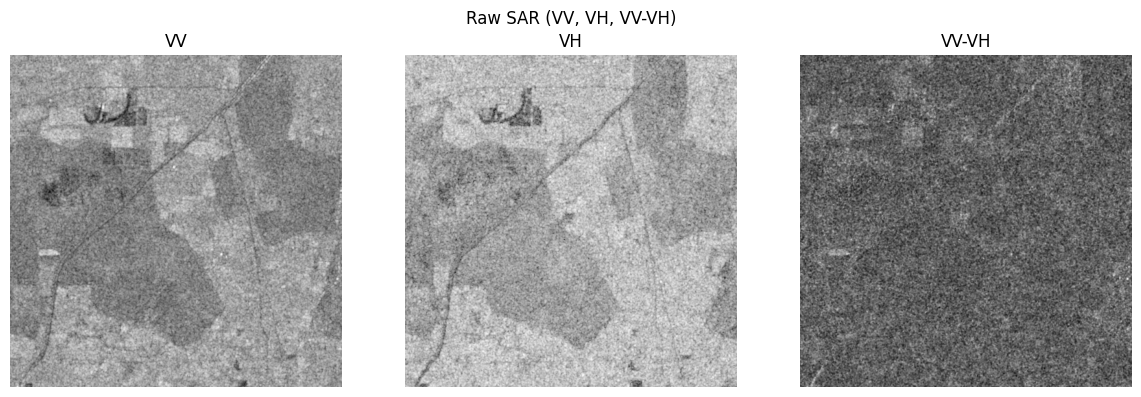

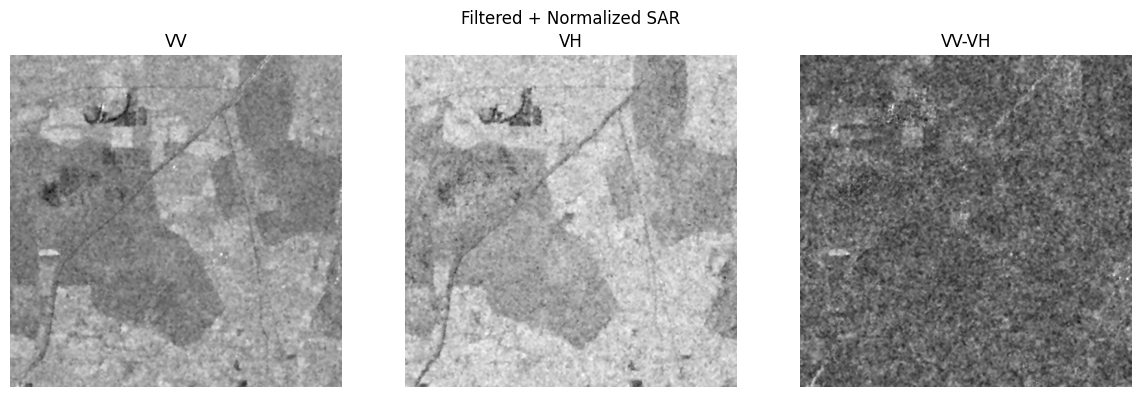

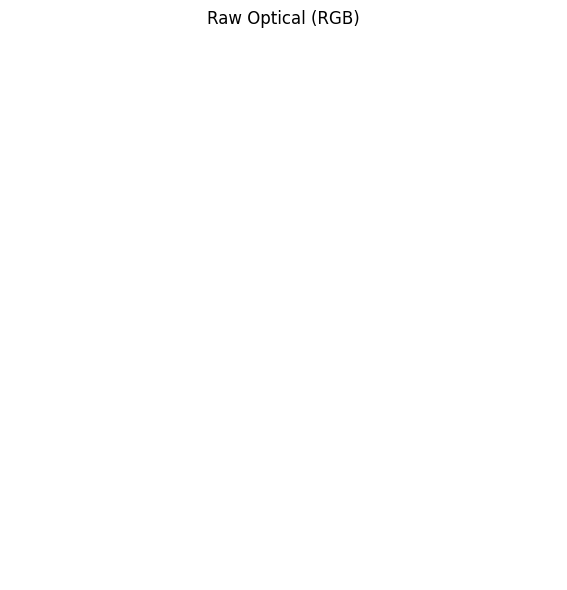

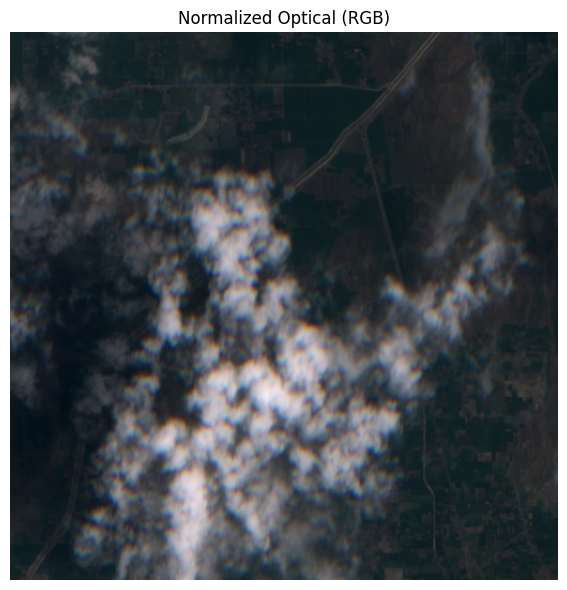

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from scipy.ndimage import uniform_filter
from numpy import var as variance
import logging

logger = logging.getLogger(__name__)

# ------------------------ LEE FILTER ------------------------
def lee_filter(img, size):
    logger.info("Applying Lee filter with window size=%s", size)
    img_mean = uniform_filter(img, (size, size))
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2
    overall_variance = variance(img)
    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output

# ------------------------ LOADERS ------------------------
def load_and_stack_sar(vv_path, vh_path, filter_size=5):
    with rasterio.open(vv_path) as src:
        s1_vv = src.read(1).astype(np.float32)
    with rasterio.open(vh_path) as src:
        s1_vh = src.read(1).astype(np.float32)

    s1_vv = lee_filter(s1_vv, filter_size)
    s1_vh = lee_filter(s1_vh, filter_size)

    return np.stack([s1_vv, s1_vh, s1_vv - s1_vh], axis=0)

def load_and_stack_optical(r_path, g_path, b_path):
    with rasterio.open(r_path) as src:
        s2_r = src.read(1).astype(np.float32)
    with rasterio.open(g_path) as src:
        s2_g = src.read(1).astype(np.float32)
    with rasterio.open(b_path) as src:
        s2_b = src.read(1).astype(np.float32)
    return np.stack([s2_r, s2_g, s2_b], axis=0)

# ------------------------ NORMALIZERS ------------------------
def normalize_sar(sar_img):
    logger.info("Normalizing SAR image")
    normalized_channels = []
    for i in range(sar_img.shape[0]):
        channel = sar_img[i]
        cmin, cmax = channel.min(), channel.max()
        norm = 2 * (channel - cmin) / (cmax - cmin) - 1
        normalized_channels.append(norm)
    return np.stack(normalized_channels, axis=0).astype(np.float32)

def normalize_optical(optical_img):
    logger.info("Normalizing optical image")
    cmin, cmax = optical_img.min(), optical_img.max()
    return 2 * (optical_img - cmin) / (cmax - cmin) - 1

# ------------------------ VISUALIZATION ------------------------
def show_image(img, title='', is_sar=False):
    if is_sar:
        titles = ['VV', 'VH', 'VV-VH']
        plt.figure(figsize=(12, 4))
        for i in range(img.shape[0]):
            plt.subplot(1, 3, i + 1)
            plt.imshow(img[i], cmap='gray')
            plt.title(titles[i])
            plt.axis('off')
        plt.suptitle(title)
    else:
        img = np.moveaxis(img, 0, -1)
        img = (img + 1) / 2
        plt.figure(figsize=(6, 6))
        plt.imshow(np.clip(img, 0, 1))
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# ------------------------ PIPELINE ------------------------
def visualize_sample_with_preprocessing(manifest_path, sample_idx=0):
    df = pd.read_csv(manifest_path)
    sample = df.iloc[sample_idx]

    # Load original SAR (no filtering)
    with rasterio.open(sample['s1_vv']) as src:
        s1_vv_raw = src.read(1).astype(np.float32)
    with rasterio.open(sample['s1_vh']) as src:
        s1_vh_raw = src.read(1).astype(np.float32)
    raw_sar = np.stack([s1_vv_raw, s1_vh_raw, s1_vv_raw - s1_vh_raw], axis=0)
    show_image(raw_sar, title="Raw SAR (VV, VH, VV-VH)", is_sar=True)

    # Load + filter + normalize SAR
    sar = load_and_stack_sar(sample['s1_vv'], sample['s1_vh'], filter_size=5)
    sar_norm = normalize_sar(sar)
    show_image(sar_norm, title="Filtered + Normalized SAR", is_sar=True)

    # Load optical
    optical = load_and_stack_optical(sample['s2_b4_red'], sample['s2_b3_green'], sample['s2_b2_blue'])
    show_image(optical, title="Raw Optical (RGB)")

    # Normalize optical
    optical_norm = normalize_optical(optical)
    show_image(optical_norm, title="Normalized Optical (RGB)")

# ------------------------ ENTRY ------------------------
if __name__ == "__main__":
    MANIFEST_PATH = "data/processed/data_manifest.csv"
    visualize_sample_with_preprocessing(MANIFEST_PATH, sample_idx=526)
